In [2]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
data = pd.read_csv(r'C:\Users\hp\Downloads\titanic_dataset.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# PassengerId Column as index Column

In [5]:
data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Basic Details of the Data

In [6]:
data.shape

(891, 12)

Dataset has 891 Rows and 12 Columns

# Checking for Missing Values in the Dataset


In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Checking the Datatypes for all the columns

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To get the Column Names in the Dataset

In [10]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Taking the Numerical Column in the Dataset having missing Values

In [11]:
num_cols=data[['Age']]

# Replacing the Missing Values in the Numerical Column with Mean Value

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)

In [14]:
num_cols=pd.DataFrame(num_cols,columns=[['Age']])

# Dropping the Original Column in the Dataset and Replacing with the Transformed Column

In [15]:
data.drop(['Age'],inplace=True,axis=1)

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


In [17]:
data=pd.concat([num_cols,data],axis=1)
data.columns = data.columns.map(''.join)


In [18]:
data.head()

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,22.0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,26.0,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,35.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,35.0,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


# Checking for Missing Values

In [19]:
data.isna().sum()

Age              0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Replacing the Missing Values in Columns with string Datatype with Blanks

In [20]:
data.fillna('',inplace=True)

In [21]:
data.isna().sum()

Age            0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
data.set_index('PassengerId',inplace=True)

# Outliers 


In [23]:
data.head()

,Age,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,22.0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,,S
2,38.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
3,26.0,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,,S
4,35.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
5,35.0,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,,S


In [24]:
data.columns

Index(['Age', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Outliers in Fare

Text(0.5, 1.0, 'Outliers')

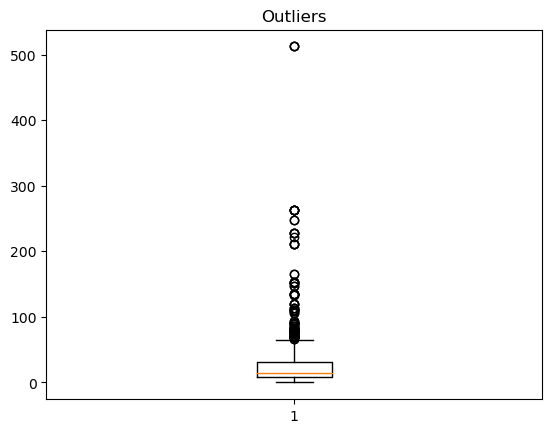

In [25]:
plt.boxplot(data['Fare'])
plt.title("Outliers")

In [26]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [27]:
data.describe()

,Age,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.383838,2.308642,0.523008,0.381594,32.204208
std,13.002015,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,3.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,3.000000,1.000000,0.000000,31.000000
max,80.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [28]:
data['Fare'].median()

14.4542

In [29]:
IQR = Q3-Q1
IQR

23.0896

In [30]:
low_limit=Q1-1.*IQR
upper_limit=Q3+1.5*IQR
low_limit


-15.179200000000002

In [31]:
upper_limit

65.6344

In [32]:
outliers=[]
for i in data['Fare']:
    if(i>upper_limit) or (i<low_limit):
        outliers.append(i)
    

In [33]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [34]:
ind=data['Fare']>upper_limit
a=data.loc[ind].index
a

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

# Outliers in Pclass

Text(0.5, 1.0, 'Outliers')

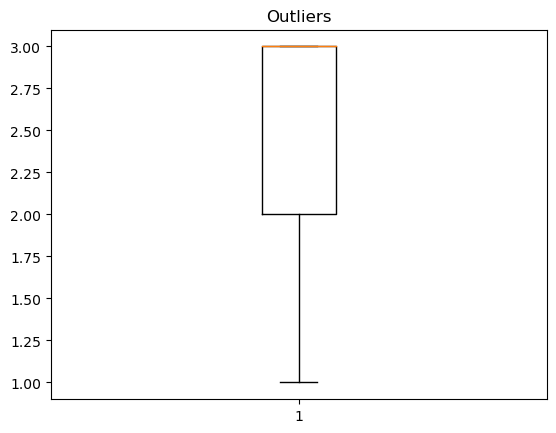

In [35]:
plt.boxplot(data['Pclass'])
plt.title("Outliers")

No Outliers found in the column Pclass

#  Outliers in SibSp

Text(0.5, 1.0, 'Outliers')

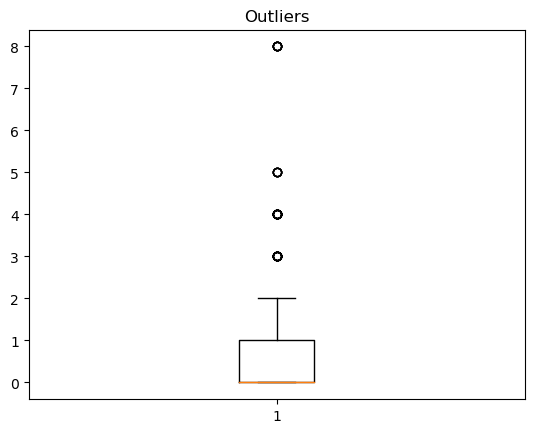

In [36]:
plt.boxplot(data['SibSp'])
plt.title("Outliers")

In [37]:
Q4=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q5=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q6=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q4)
print(Q5)
print(Q6)

0.0
0.0
1.0


In [38]:
IQR1=Q6-Q4
IQR1

1.0

In [39]:
lo_limit=Q4-1.*IQR1
up_limit=Q6+1.5*IQR1
lo_limit

-1.0

In [40]:
up_limit

2.5

In [41]:
outliersSibSp=[]
for i in data['SibSp']:
    if(i>up_limit) or (i<lo_limit):
        outliersSibSp.append(i)
    

In [42]:
outliersSibSp

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [43]:
ind1=data['SibSp']>up_limit
a=data.loc[ind1].index
a

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')


# Dropping the Outliers from SibSp

In [44]:
data.drop([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863])

,Age,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,22.000000,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,,S
2,38.000000,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
3,26.000000,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,,S
4,35.000000,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
5,35.000000,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...
887,27.000000,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,,S
888,19.000000,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S
889,29.699118,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,,S


# Min Max Scaling

In [45]:
data1= data.drop(['Name'],axis=1)
data1= data1.drop(['Sex'],axis=1)
data1=data1.drop(['Ticket'],axis=1)
data1=data1.drop(['Cabin'],axis=1)
data1=data1.drop(['Embarked'],axis=1)
data1

,Age,Survived,Pclass,SibSp,Parch,Fare
PassengerId,,,,,,
1,22.000000,0,3,1,0,7.2500
2,38.000000,1,1,1,0,71.2833
3,26.000000,1,3,0,0,7.9250
4,35.000000,1,1,1,0,53.1000
5,35.000000,0,3,0,0,8.0500
...,...,...,...,...,...,...
887,27.000000,0,2,0,0,13.0000
888,19.000000,1,1,0,0,30.0000
889,29.699118,0,3,1,2,23.4500


# Creating Feature Set and Target Set

In [46]:
x=data1.drop(['Survived'],axis=1)
y=data1['Survived']

x - Feature set & y - Target set

# Scaling

In [47]:
from sklearn import preprocessing

In [48]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=[0,1])

In [49]:
x=min_max_scaler.fit_transform(x)

In [50]:
type(x)

numpy.ndarray

In [51]:
x=pd.DataFrame(x)
x


,0,1,2,3,4
0,0.271174,1.0,0.125,0.000000,0.014151
1,0.472229,0.0,0.125,0.000000,0.139136
2,0.321438,1.0,0.000,0.000000,0.015469
3,0.434531,0.0,0.125,0.000000,0.103644
4,0.434531,1.0,0.000,0.000000,0.015713
...,...,...,...,...,...
886,0.334004,0.5,0.000,0.000000,0.025374
887,0.233476,0.0,0.000,0.000000,0.058556
888,0.367921,1.0,0.125,0.333333,0.045771
889,0.321438,0.0,0.000,0.000000,0.058556


In [52]:

x.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.367921,0.654321,0.065376,0.063599,0.062858
std,0.163383,0.418036,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.500000,0.000000,0.000000,0.015440
50%,0.367921,1.000000,0.000000,0.000000,0.028213
75%,0.434531,1.000000,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000
